In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy.matlib 
import csv

- Exercise 2: Consider the following differential equation

* part 1

In [ ]:
## The jacobian is
J=[[-2,1],[-3,1]]

eig=np.linalg.eig(J) ## np.linealg.eig returns the eigenvalues and eigenvectors of the matrix respectively

eigenvalues=np.array(eig[0]) ## Save the eigenvalues

eigenvectors=np.array(eig[1]) ## Save the eigenvectors

print('The eigenvalues are: ',eig[0], 'The eigenvectors are: ', eigenvectors[:,0],eigenvectors[:,1])
print('Since the eigenvalues are both negative, the equilibrium point (0,0) is stable')

The eigenvalues are:  [-0.5+0.8660254j -0.5-0.8660254j] The eigenvectors are:  [0.4330127-0.25j 0.8660254+0.j  ] [0.4330127+0.25j 0.8660254-0.j  ]
Since the eigenvalues are both negative, the equilibrium point (0,0) is stable


In [ ]:
class Numerical_methods_ex2:
    
    def __init__(self,F):  
        
        self.F=F
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)               ## The main differenece in comparison to the class in the previous lab is in the definition 
                                             ## and utilisation of variables x and X, which are multidimensional.  
        
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*F(self.x,self.t)
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

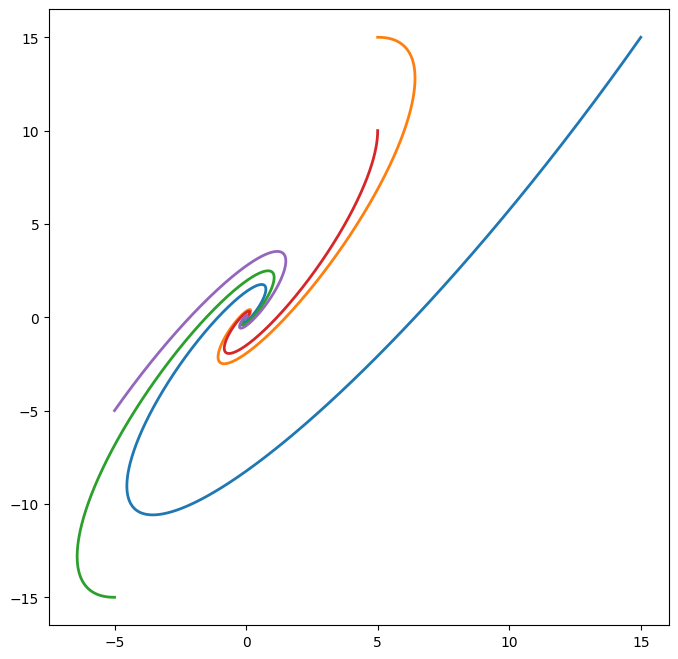

In [ ]:
def F(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
   
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=-2 * x[0] + x[1]
    z[1]=-3 * x[0] + x[1]
    
    return z

## As in the previous lab, use the class and the function above to complete the exercise...

NM_ex2=Numerical_methods_ex2(F)           ## Object definition


dt=0.01                           ## Value of dt
N_iter=int(1000/dt)               ## Number of iteration. 

X_euler=np.zeros([2,N_iter])
t_start=0.

x_start=[15,15]                    ## First initial condition
NM_ex2.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler1,ts=NM_ex2.Euler(dt,N_iter) 


x_start=[5,15]                     ## Second initial condition
NM_ex2.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler2,ts=NM_ex2.Euler(dt,N_iter) 


x_start=[-5,-15]                   ## Third initial condition
NM_ex2.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler3,ts=NM_ex2.Euler(dt,N_iter) 

x_start=[5,10]                   ## forth initial condition
NM_ex2.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler4,ts=NM_ex2.Euler(dt,N_iter) 

x_start=[-5,-5]                   ## fifth initial condition
NM_ex2.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler5,ts=NM_ex2.Euler(dt,N_iter) 

## Plot of the three solutions
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(X_euler1[0,:],X_euler1[1,:],lw=2)
plt.plot(X_euler2[0,:],X_euler2[1,:],lw=2)
plt.plot(X_euler3[0,:],X_euler3[1,:],lw=2)
plt.plot(X_euler4[0,:],X_euler4[1,:],lw=2)
plt.plot(X_euler5[0,:],X_euler5[1,:],lw=2)
